In [1]:
# Import necessary libraries for data manipulation, modeling, and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
# Set a random seed for reproducibility
np.random.seed(42)

# Load the Wine Dataset from sklearn
wine_data = load_wine()

# Create a DataFrame for easier data exploration
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Display class distribution
print("\nClass Distribution:")
print(df['target'].value_counts())

# Display feature information
print("\nFeature Information:")
print(df.describe())


Dataset Shape: (178, 14)

First 5 rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_dilu

In [4]:
# Split the dataset into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Standardize the features to ensure all have equal importance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 142 samples
Test set size: 36 samples


In [5]:
# Define the k values to test
k_values = [1, 5, 11, 15, 21]

# Create lists to store accuracy scores
knn_accuracies = []

# Implement and evaluate KNN for each k value
for k in k_values:
    # Create a KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model using the training data
    knn.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    knn_accuracies.append(accuracy)

    print(f"KNN with k={k}: Accuracy = {accuracy:.4f}")

# Create a DataFrame to store the results
knn_results = pd.DataFrame({
    'k_value': k_values,
    'accuracy': knn_accuracies
})

# Display the results
print("\nKNN Results:")
print(knn_results)

KNN with k=1: Accuracy = 0.9444
KNN with k=5: Accuracy = 0.9444
KNN with k=11: Accuracy = 0.9444
KNN with k=15: Accuracy = 0.9722
KNN with k=21: Accuracy = 0.9444

KNN Results:
   k_value  accuracy
0        1  0.944444
1        5  0.944444
2       11  0.944444
3       15  0.972222
4       21  0.944444


In [6]:
# Define the radius values to test
radius_values = [350, 400, 450, 500, 550, 600]

# Create lists to store accuracy scores
rnn_accuracies = []

# Implement and evaluate RNN for each radius value
for radius in radius_values:
    try:
        # Create a RNN classifier with the current radius value
        rnn = RadiusNeighborsClassifier(radius=radius)

        # Train the model using the training data
        rnn.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = rnn.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        rnn_accuracies.append(accuracy)

        print(f"RNN with radius={radius}: Accuracy = {accuracy:.4f}")
    except ValueError as e:
        # Handle cases where radius might be too small
        print(f"RNN with radius={radius}: Error - {str(e)}")
        rnn_accuracies.append(0)  # Assign 0 accuracy for failed models

# Create a DataFrame to store the results
rnn_results = pd.DataFrame({
    'radius_value': radius_values,
    'accuracy': rnn_accuracies
})

# Display the results
print("\nRNN Results:")
print(rnn_results)

RNN with radius=350: Accuracy = 0.3889
RNN with radius=400: Accuracy = 0.3889
RNN with radius=450: Accuracy = 0.3889
RNN with radius=500: Accuracy = 0.3889
RNN with radius=550: Accuracy = 0.3889
RNN with radius=600: Accuracy = 0.3889

RNN Results:
   radius_value  accuracy
0           350  0.388889
1           400  0.388889
2           450  0.388889
3           500  0.388889
4           550  0.388889
5           600  0.388889


Text(12.0, 0.9222222222222222, 'Best: k=15.0, Acc=0.972')

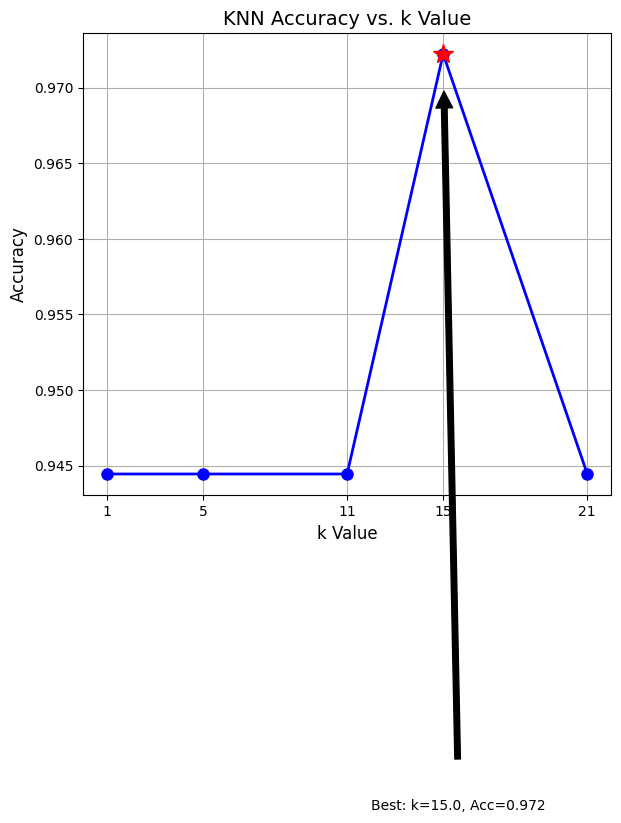

In [9]:
# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Plot 1: KNN Accuracy vs. k Value
plt.subplot(1, 2, 1)
plt.plot(knn_results['k_value'], knn_results['accuracy'], 'bo-', linewidth=2, markersize=8)
plt.title('KNN Accuracy vs. k Value', fontsize=14)
plt.xlabel('k Value', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True)
plt.xticks(k_values)

# Highlight the best k value
best_k_idx = np.argmax(knn_results['accuracy'])
best_k = knn_results.iloc[best_k_idx]['k_value']
best_k_accuracy = knn_results.iloc[best_k_idx]['accuracy']
plt.plot(best_k, best_k_accuracy, 'r*', markersize=15)
plt.annotate(f'Best: k={best_k}, Acc={best_k_accuracy:.3f}',
             xy=(best_k, best_k_accuracy),
             xytext=(best_k-3, best_k_accuracy-0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))

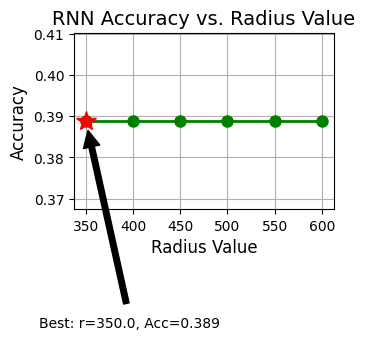

In [10]:
# Plot 2: RNN Accuracy vs. Radius Value
plt.subplot(1, 2, 2)
plt.plot(rnn_results['radius_value'], rnn_results['accuracy'], 'go-', linewidth=2, markersize=8)
plt.title('RNN Accuracy vs. Radius Value', fontsize=14)
plt.xlabel('Radius Value', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True)
plt.xticks(radius_values)

# Highlight the best radius value
best_r_idx = np.argmax(rnn_results['accuracy'])
best_r = rnn_results.iloc[best_r_idx]['radius_value']
best_r_accuracy = rnn_results.iloc[best_r_idx]['accuracy']
plt.plot(best_r, best_r_accuracy, 'r*', markersize=15)
plt.annotate(f'Best: r={best_r}, Acc={best_r_accuracy:.3f}',
             xy=(best_r, best_r_accuracy),
             xytext=(best_r-50, best_r_accuracy-0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.savefig('knn_rnn_comparison.png')
plt.show()

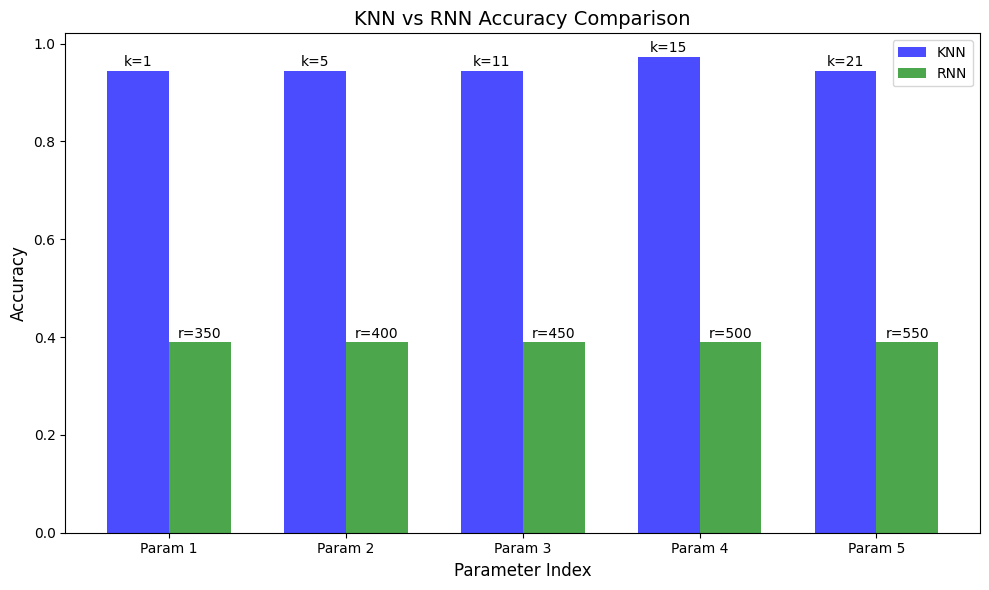

In [11]:
# Create a comparison bar chart
plt.figure(figsize=(10, 6))
x = np.arange(len(k_values))
width = 0.35

plt.bar(x - width/2, knn_results['accuracy'], width, label='KNN', color='blue', alpha=0.7)
# For RNN, we'll use the same number of points as KNN for easier comparison
rnn_subset = rnn_results.iloc[:len(k_values)]
plt.bar(x + width/2, rnn_subset['accuracy'], width, label='RNN', color='green', alpha=0.7)

plt.xlabel('Parameter Index', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('KNN vs RNN Accuracy Comparison', fontsize=14)
plt.xticks(x, [f'Param {i+1}' for i in range(len(k_values))])
plt.legend()

# Add parameter values as annotations
for i, (k, r) in enumerate(zip(k_values, radius_values[:len(k_values)])):
    plt.text(i - width/2, knn_results.iloc[i]['accuracy'] + 0.01, f'k={k}', ha='center')
    plt.text(i + width/2, rnn_subset.iloc[i]['accuracy'] + 0.01, f'r={r}', ha='center')

plt.tight_layout()
plt.savefig('knn_rnn_bar_comparison.png')
plt.show()

Model Comparison Summary:

Best KNN: k=15.0 with accuracy 0.9722

Best RNN: radius=350.0 with accuracy 0.3889

KNN performed better than RNN for this dataset.
KNN is preferable when the data has well-defined clusters and the number of neighbors is more important than distance.

Conclusion and Insights:

KNN outperformed RNN with an accuracy of 0.9722 vs 0.3889.

Potential reasons for KNN's better performance:
- The Wine dataset has relatively uniform density across classes
- The optimal number of neighbors provides better classification than a fixed radius
- KNN is less sensitive to outliers in this particular dataset

When to use KNN vs RNN:
- Use KNN when you have a relatively uniform distribution of points and want to classify based on a fixed number of neighbors.
- Use RNN when the density of points varies significantly across the feature space and you want to classify based on a fixed distance threshold.
- KNN is generally more robust to outliers, while RNN can be more sensitive to the choice of radius.
- In practice, both models should be tested with cross-validation to determine which works better for a specific dataset.
